# EJERCICIO 4. ESTANDARIZACIÓN DE DATOS Y SEMIVARIOGRAMA EN PYTHON

Adaptado al español por: Brenda Ortiz Soto

Versión original: Michael Pyrcz

En este ejercicio estandarizaremos datos para posteriormente graficar un semivariograma. Puedes encontrar el *data set* [aquí.](https://github.com/GeostatsGuy/GeoDataSets/blob/master/sample_data.csv) El *data set* contiene datos de porosidad y permeabilidad de dos facies distintas.
Los datos contienen la siguiente información: coordenadas en 'X' (metros), coordenadas en 'Y'(metros), facies (0 si corresponde a lutita o 1 si corresponde a areniscas), así como datos de porosidad (fracción) y permeabilidad (mDarcy).

Este ejercicio es adaptado al español, la versión original es del profesor Michael Pyrcz, quién se dedica a la enseñanza de Geoestadística, Machine Learning y Análisis de datos espaciales, te dejo el enlace a su [página personal](http://www.michaelpyrcz.com/) y te invito a visitar todo el contenido que genera y comparte en Github así como en Youtube. OJO: Michael Pyrcz es el autor, este ejercicio sólo es una adaptación al español de su trabajo.

Para este ejercicio, requerimos importar una libería que aún no hemos utilizado y requiere una previa instalación. Dicha librería es "geostatspy". Encuentra la documentación [aquí](https://github.com/GeostatsGuy/GeostatsPy).

Para su instalación nos dirigimos a "Anaconda", damos click en "Environments", damos click en el triángulo verde (junto a "base(root)"), click en "Open Terminal" y escribimos "pip install geostatspy".

## Importación de librerías

In [20]:
import geostatspy.GSLIB as GSLIB                       
import geostatspy.geostats as geostats

In [21]:
import numpy as np                                     
import pandas as pd                                   
import matplotlib.pyplot as plt 

## Lectura del set de datos

In [24]:
df = pd.read_csv("data_var.csv")                     

In [25]:
df.head()

,X,Y,Facies,Porosity,Perm,AI
0,100.0,900.0,1.0,0.100187,1.363890,5110.699751
1,100.0,800.0,0.0,0.107947,12.576845,4671.458560
2,100.0,700.0,0.0,0.085357,5.984520,6127.548006
3,100.0,600.0,0.0,0.108460,2.446678,5201.637996
4,100.0,500.0,0.0,0.102468,1.952264,3835.270322


In [26]:
#Del DataFrame original, haremos dos copias, uno incluirá únicamente las facies de arenas y otro incluirá las facies de lutita

df_sand = pd.DataFrame.copy(df[df['Facies'] == 1]).reset_index() #[df['Facies'] == 1] de la columna Facies copia únicamente los valores iguales a 1
df_shale = pd.DataFrame.copy(df[df['Facies'] == 0]).reset_index() #[df['Facies'] == 0] de la columna Facies copia únicamente los valores iguales a 0
df_sand.head()                #previsualiza únicamente los datos con facies = 1, los cuales están guardados en el nuevo dataframe "df_sand"

,index,X,Y,Facies,Porosity,Perm,AI
0,0,100.0,900.0,1.0,0.100187,1.363890,5110.699751
1,8,100.0,100.0,1.0,0.137453,5.727603,5823.241783
2,9,200.0,900.0,1.0,0.137062,14.771314,5621.146994
3,10,200.0,800.0,1.0,0.125984,10.675436,4292.700500
4,18,300.0,900.0,1.0,0.111516,27.999817,4183.466773


In [27]:
df_shale.head() #previsualiza únicamente los datos con facies = 0, los cuales están guardados en el nuevo dataframe "df_shale"

,index,X,Y,Facies,Porosity,Perm,AI
0,1,100.0,800.0,0.0,0.107947,12.576845,4671.458560
1,2,100.0,700.0,0.0,0.085357,5.984520,6127.548006
2,3,100.0,600.0,0.0,0.108460,2.446678,5201.637996
3,4,100.0,500.0,0.0,0.102468,1.952264,3835.270322
4,5,100.0,400.0,0.0,0.110579,3.691908,5295.267191


## Resumen estadístico

In [28]:
df_sand.describe().transpose()    #resumen estadístico de las facies de arenas

,count,mean,std,min,25%,50%,75%,max
index,162.0,117.981481,59.058816,0.000000,75.250000,117.500000,157.750000,260.000000
X,162.0,831.111111,238.857269,50.000000,800.000000,945.000000,975.000000,1005.000000
Y,162.0,526.987654,142.707797,100.000000,469.000000,509.000000,549.000000,939.000000
Facies,162.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Porosity,162.0,0.181001,0.037196,0.083842,0.155735,0.194823,0.207754,0.242298
Perm,162.0,293.798999,399.989890,0.381032,31.996547,155.888123,385.177730,2642.999829
AI,162.0,3441.701689,969.924695,1844.166880,2748.296631,3179.596509,3998.567914,6197.834381


In [29]:
df_shale.describe().transpose()           #resumen estadístico de las facies de lutita

,count,mean,std,min,25%,50%,75%,max
index,99.0,149.666667,93.588330,1.000000,41.500000,201.000000,225.500000,259.000000
X,99.0,300.444444,196.365820,40.000000,201.000000,231.000000,300.000000,970.000000
Y,99.0,425.111111,183.665784,29.000000,376.000000,416.000000,456.000000,989.000000
Facies,99.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Porosity,99.0,0.100212,0.014483,0.058871,0.091902,0.101987,0.109846,0.141657
Perm,99.0,3.568463,6.782476,0.033611,0.723788,1.530878,3.743835,52.500870
AI,99.0,5450.493543,728.871517,3595.586977,4897.828718,5570.604405,5951.816775,7881.898531


Analizando el resumen estadístico de las facies de arenas y las facies de lutita, ¿qué interpretaciones puedes hacer respecto a la porosidad y la permeabilidad?

Se procede a la estandarización de los datos *(normal score)* en conjunto y separados por facies. Esto es requisito para la simulación Gaussiana secuencial, además la transformación Gaussiana nos ayuda con los valores atípicos *(outliers)* y provee variogramas interpretables. Esto lo lograremos con la librería "geostats".

In [30]:
geostats.nscore        #para observar los parámetros requeridos para la función nscore    

<function geostatspy.geostats.nscore(df, vcol, wcol=None, ismooth=False, dfsmooth=None, smcol=0, smwcol=0)>

## Estandarización de datos

In [31]:
#Transformación gaussiana para todos los datos

#df['Npor'] es la nueva columna que almacenará los datos estandarizados para la propiedad de porosidad
df['NPor'], tvPor, tnsPor = geostats.nscore(df, 'Porosity') #estandarización para los valores de la columna de Porosidad de todos los datos

#Transformación gaussiana por facies (arenas)
df_sand['NPor'], tvPorSand, tnsPorSand = geostats.nscore(df_sand, 'Porosity') #estandarización de los valores de porosidad para las facies de arenas
#Transformación gaussiana por facies (lutitas)
df_shale['NPor'], tvPorShale, tnsPorShale = geostats.nscore(df_shale, 'Porosity') #estandarización de los valores de porosidad para las facies de lutitas

#Transformación gaussiana para todos los datos
df['NPerm'], tvPermSand, tnsPermSand = geostats.nscore(df, 'Perm')  #estandarización para los valores de la columna de Permeabilidad de todos los datos

#Transformación gaussiana por facies (arenas)
df_sand['NPerm'], tvPermSand, tnsPermSand = geostats.nscore(df_sand, 'Perm') #estandarización de los valores de permeabilidad para las facies de arenas
#Transformación gaussiana por facies (lutitas)
df_shale['NPerm'], tvPermShale, tnsPermShale = geostats.nscore(df_shale, 'Perm')  #estandarización de los valores de permeabilidad para las facies de lutitas

In [32]:
#Previsualizando los dataframes con los valores estandarizados, como puedes observar se agregaron dos columnas "Npor" y "Nperm"
df.head()

,X,Y,Facies,Porosity,Perm,AI,NPor,NPerm
0,100.0,900.0,1.0,0.100187,1.363890,5110.699751,-0.907799,-0.893392
1,100.0,800.0,0.0,0.107947,12.576845,4671.458560,-0.566754,-0.144561
2,100.0,700.0,0.0,0.085357,5.984520,6127.548006,-1.498129,-0.322431
3,100.0,600.0,0.0,0.108460,2.446678,5201.637996,-0.522198,-0.624092
4,100.0,500.0,0.0,0.102468,1.952264,3835.270322,-0.810549,-0.758293


In [33]:
df_sand.head()                    

,index,X,Y,Facies,Porosity,Perm,AI,NPor,NPerm
0,0,100.0,900.0,1.0,0.100187,1.363890,5110.699751,-2.158819,-2.158819
1,8,100.0,100.0,1.0,0.137453,5.727603,5823.241783,-0.817609,-1.468475
2,9,200.0,900.0,1.0,0.137062,14.771314,5621.146994,-0.839418,-0.955141
3,10,200.0,800.0,1.0,0.125984,10.675436,4292.700500,-1.031153,-1.237102
4,18,300.0,900.0,1.0,0.111516,27.999817,4183.466773,-1.621370,-0.694044


In [34]:
df_shale.head()                    

,index,X,Y,Facies,Porosity,Perm,AI,NPor,NPerm
0,1,100.0,800.0,0.0,0.107947,12.576845,4671.458560,0.501298,1.807354
1,2,100.0,700.0,0.0,0.085357,5.984520,6127.548006,-0.967422,1.051717
2,3,100.0,600.0,0.0,0.108460,2.446678,5201.637996,0.589456,0.389414
3,4,100.0,500.0,0.0,0.102468,1.952264,3835.270322,0.050661,0.152506
4,5,100.0,400.0,0.0,0.110579,3.691908,5295.267191,0.781781,0.650837


## Comparación de valores y valores estandarizados

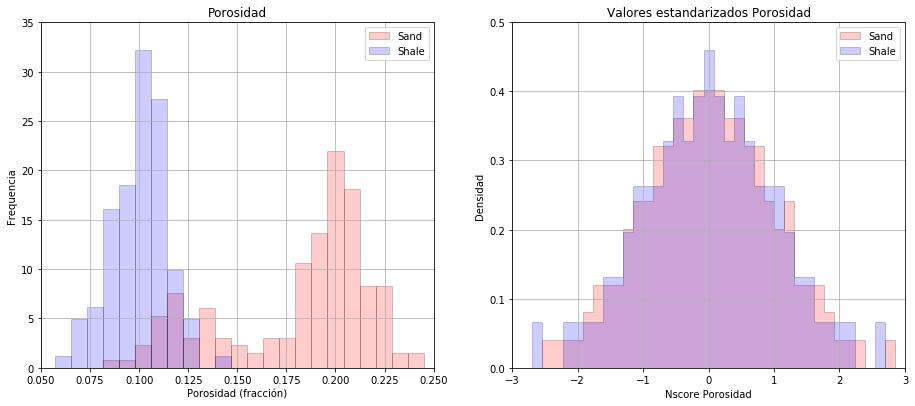

In [35]:
#Ahora comparemos en dos gráficos los valores de porosidad de ambas facies contra los valores estandarizados de porosidad de ambas facies
#Si queremos dibujar varios gráficos en un mismo espacio hacemos uso del método "subplot", de ahora en adelante será de gran utilidad para comparar gráficos

#Fíjate en que el método subplot tiene 3 números en paréntesis, los cuales son 121 y 122
#Imaginemos que estamos dibujando una tabla, donde el primer número es el número de filas y el segundo número es el número de columnas
#Por lo tanto nuestra "tabla" es de 1x2 (una fila y dos columnas) y el tercer número nos indicaría la celda o espacio donde se dibuja el subplot

plt.subplot(121)                    #histograma que muestra la porosidad de ambas facies
#Graficando la porosidad de las facies de arenas en rojo
plt.hist(df_sand['Porosity'], facecolor='red',bins=np.linspace(0.0,0.4,50),alpha=0.2,density=True,edgecolor='black',label='Sand')
#Graficando la porosidad de las facies de lutitas en azul
plt.hist(df_shale['Porosity'], facecolor='blue',bins=np.linspace(0.0,0.4,50),alpha=0.2,density=True,edgecolor='black',label = 'Shale')
#delimita los ejes, eje "x" de 0.05 a 0.25 y eje  "y" de 0 a 35.0
plt.xlim([0.05,0.25]); plt.ylim([0,35.0])
#Etiquetando ejes y título del gráfico
plt.xlabel('Porosidad (fracción)'); plt.ylabel('Frequencia'); plt.title('Porosidad')
plt.legend(loc='upper right')  #ubicación de la leyenda
plt.grid(True)

plt.subplot(122)                    #histograma que muestra los valores estandarizados de porosidad de ambas facies
#Graficando los valores estandarizados de porosidad de las facies de arenas en rojo
plt.hist(df_sand['NPor'], facecolor='red',bins=np.linspace(-3.0,3.0,40),histtype="stepfilled",alpha=0.2,density=True,cumulative=False,edgecolor='black',label='Sand')
#Graficando los valores estandarizados de porosidad de las facies de lutitas en azul
plt.hist(df_shale['NPor'], facecolor='blue',bins=np.linspace(-3.0,3.0,40),histtype="stepfilled",alpha=0.2,density=True,cumulative=False,edgecolor='black',label='Shale')
#delimita los ejes, eje "x" de -3.0 a 3.0 y eje  "y" de 0 a 0.50
plt.xlim([-3.0,3.0]); plt.ylim([0,0.50])
plt.xlabel('Nscore Porosidad'); plt.ylabel('Densidad'); plt.title('Valores estandarizados Porosidad')
plt.legend(loc='upper right')
plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)
plt.show()

¿Qué diferencias observas entre ambos gráficos? ¿Cuál es la finalidad de estandarizar los datos?

Ahora ubiquemos los datos espacialmente:

## Ubicando los datos espacialmente

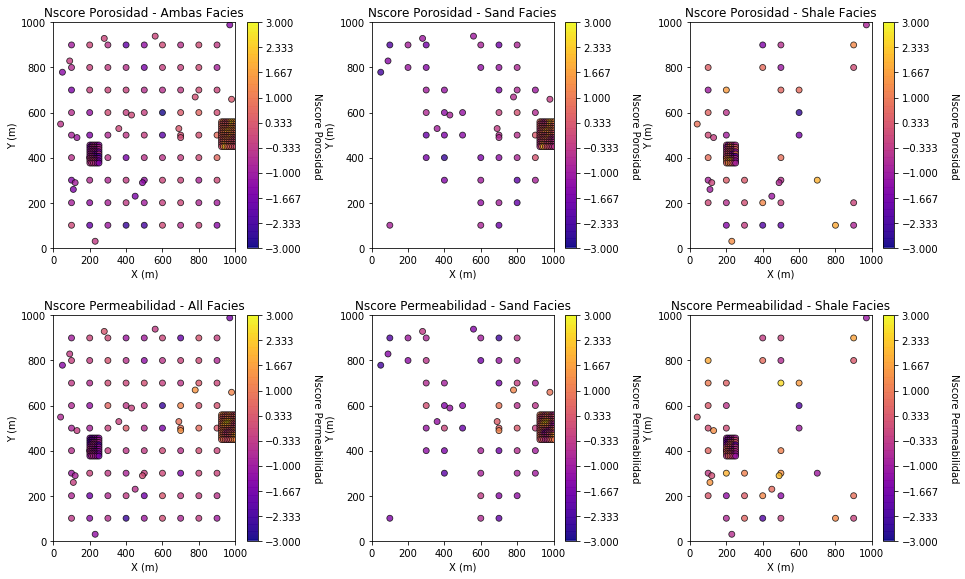

In [36]:
#Grafiquemos subplots, ahora será de 2 filas y 3 columnas.

cmap = plt.cm.plasma             #establecemos los colores del mapa, en este caso "plasma". Existen otros como 'viridis', 'inferno', 'magma'.

#Graficando los valores estandarizados de porosidad ambas facies
plt.subplot(231)
GSLIB.locmap_st(df,'X','Y','NPor',0,1000,0,1000,-3,3,'Nscore Porosidad - Ambas Facies','X (m)','Y (m)','Nscore Porosidad',cmap)

#Graficando los valores estandarizados de porosidad de las facies de arenas
plt.subplot(232)
GSLIB.locmap_st(df_sand,'X','Y','NPor',0,1000,0,1000,-3,3,'Nscore Porosidad - Sand Facies','X (m)','Y (m)','Nscore Porosidad',cmap)

#Graficando los valores estandarizados de porosidad de las facies de lutitas
plt.subplot(233)
GSLIB.locmap_st(df_shale,'X','Y','NPor',0,1000,0,1000,-3,3,'Nscore Porosidad - Shale Facies','X (m)','Y (m)','Nscore Porosidad',cmap)

#Graficando los valores estandarizados de permeabilidad de ambas facies
plt.subplot(234)
GSLIB.locmap_st(df,'X','Y','NPerm',0,1000,0,1000,-3,3,'Nscore Permeabilidad - All Facies','X (m)','Y (m)','Nscore Permeabilidad',cmap)

#Graficando los valores estandarizados de permeabilidad de las facies de arenas
plt.subplot(235)
GSLIB.locmap_st(df_sand,'X','Y','NPerm',0,1000,0,1000,-3,3,'Nscore Permeabilidad - Sand Facies','X (m)','Y (m)','Nscore Permeabilidad',cmap)

#Graficando los valores estandarizados de permeabilidad de las facies de lutitas
plt.subplot(236)
GSLIB.locmap_st(df_shale,'X','Y','NPerm',0,1000,0,1000,-3,3,'Nscore Permeabilidad - Shale Facies','X (m)','Y (m)','Nscore Permeabilidad',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.8, wspace=0.4, hspace=0.3)
plt.show()

Ahora que ya puedes visualizar espacialmente los datos, ¿qué interpretaciones puedes hacer? ¿en qué zonas son más porosas las rocas? ¿en qué zona son más permeables? ¿a qué facies corresponden? ¿siguen alguna distribución las facies de arenas y las de lutitas?

## Semivariograma

In [37]:
geostats.gamv                    #para observar los parámetros requeridos para la función gamv

<function geostatspy.geostats.gamv(df, xcol, ycol, vcol, tmin, tmax, xlag, xltol, nlag, azm, atol, bandwh, isill)>

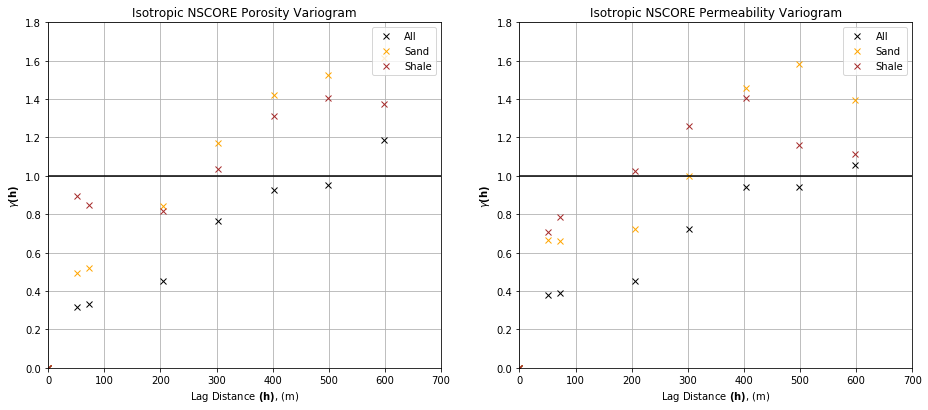

In [38]:
#Se definen los valores de los parámetros
tmin = -9999.; tmax = 9999.; 
lag_dist = 100.0; lag_tol = 100.0; nlag = 7; bandh = 9999.9; azi = 0; atol = 90.0; isill = 1

lag, por_sand_gamma, por_sand_npair = geostats.gamv(df_sand,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi,atol,bandh,isill)
lag, por_shale_gamma, por_shale_npair = geostats.gamv(df_shale,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi,atol,bandh,isill)
lag, por_gamma, por_npair = geostats.gamv(df,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi,atol,bandh,isill)

lag, perm_sand_gamma, perm_sand_npair = geostats.gamv(df_sand,"X","Y","NPerm",tmin,tmax,lag_dist,lag_tol,nlag,azi,atol,bandh,isill)
lag, perm_shale_gamma, perm_shale_npair = geostats.gamv(df_shale,"X","Y","NPerm",tmin,tmax,lag_dist,lag_tol,nlag,azi,atol,bandh,isill)
lag, perm_gamma, perm_npair = geostats.gamv(df,"X","Y","NPerm",tmin,tmax,lag_dist,lag_tol,nlag,azi,atol,bandh,isill)

plt.subplot(121)
plt.plot(lag,por_gamma,'x',color = 'black',label = 'All')
plt.plot(lag,por_sand_gamma,'x',color = 'orange',label = 'Sand')
plt.plot(lag,por_shale_gamma,'x',color = 'brown',label = 'Shale')
plt.plot([0,2000],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Isotropic NSCORE Porosity Variogram')
plt.xlim([0,700])
plt.ylim([0,1.8])
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(122)
plt.plot(lag,perm_gamma,'x',color = 'black',label = 'All')
plt.plot(lag,perm_sand_gamma,'x',color = 'orange',label = 'Sand')
plt.plot(lag,perm_shale_gamma,'x',color = 'brown',label = 'Shale')
plt.plot([0,2000],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Isotropic NSCORE Permeability Variogram')
plt.xlim([0,700])
plt.ylim([0,1.8])
plt.legend(loc='upper right')
plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)
plt.show()

¿Qué interpretación puedes hacer de los variogramas?

**Referencias:**
    
1. Pyrcz, M.J., Jo. H., Kupenko, A., Liu, W., Gigliotti, A.E., Salomaki, T., and Santos, J., 2021, GeostatsPy Python Package, PyPI, Python Package Index, https://pypi.org/project/geostatspy/.

**Este producto docente ha sido financiado por la DGAPA-UNAM a través del proyecto PAPIME PE101020 “Geología desde los ojos de un dron: una poderosa herramienta educativa para los actuales ingenieros de la Tierra”.**